In [73]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["image.cmap"] = "gray"

In [74]:
SEED_VALUE = 42

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [75]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]

y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


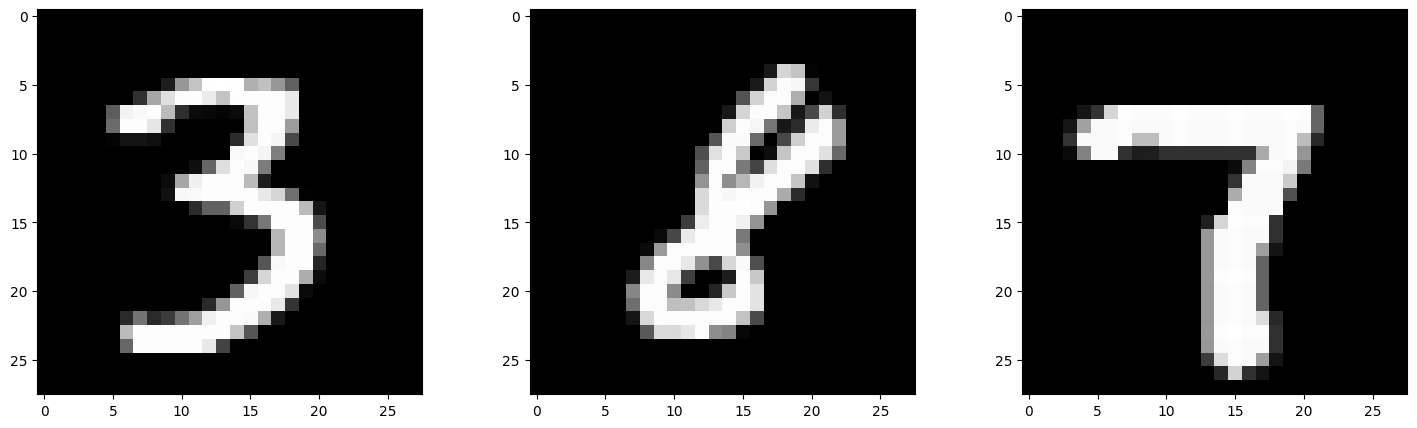

In [76]:
plt.figure(figsize=(18,5))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.axis(True)
  plt.imshow(X_train[i], cmap = "gray")
  plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [77]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255

X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype("float32") / 255

In [78]:
((X_train_fashion, y_train_fashion), (_, _)) = fashion_mnist.load_data()
print(y_train_fashion[0:9])

[9 0 0 3 0 2 7 2 5]


In [79]:
y_train_onehot = to_categorical(y_train_fashion[0:9])
print(y_train_onehot)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [80]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [81]:
model = tf.keras.Sequential()

model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
training_results = model.fit(X_train, y_train,
                             epochs=21,
                             batch_size=64,
                             validation_data=(X_valid, y_valid));

Epoch 1/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8643 - loss: 0.4780 - val_accuracy: 0.9450 - val_loss: 0.1755
Epoch 2/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9601 - loss: 0.1360 - val_accuracy: 0.9606 - val_loss: 0.1299
Epoch 3/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9746 - loss: 0.0894 - val_accuracy: 0.9657 - val_loss: 0.1118
Epoch 4/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9818 - loss: 0.0651 - val_accuracy: 0.9684 - val_loss: 0.1100
Epoch 5/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9866 - loss: 0.0491 - val_accuracy: 0.9713 - val_loss: 0.1102
Epoch 6/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9899 - loss: 0.0377 - val_accuracy: 0.9719 - val_loss: 0.1151
Epoch 7/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9927 - loss: 0.0293 - val_accuracy: 0.9714 - val_loss: 0.1276
Epoch 8/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9937 - loss: 0.0232 - val_accuracy: 0.

In [86]:
train_loss = training_results.history["loss"]
train_acc = training_results.history["accuracy"]
train_loss = training_results.history["val_loss"]
train_acc = training_results.history["val_accuracy"]

plot_results([train_loss, valid_loss],
              ylabel="Loss",
              ylim = [0.0,0.5],
              metric_name=["Training Loss", "Valitadion Loss"],
              color = ["g", "b"]
             )
plot_results([train_acc, valid_acc],
              ylabel="Accturacy",
              ylim = [0.9,1.0],
              metric_name=["Training Accuracy", "Valitadion Accuracy"],
              color = ["g", "b"]
             )

NameError: name 'plt_results' is not defined

In [ ]:
predictions = model.predict(X_test)
index = 0
print(y_test[index])

for i in range(10):
  print("digit:",i , predictions[index][i])

In [ ]:
predictions = model.predict(X_test)

predicted_labels = [np,argmax(i) for i in predictions]

y_test_interget_labels = tf.argmax(y_test, axis=1)

cm = tf.math.confusion_matrix(labels=y_test_interget_labels, predictions=predicted_labels)

plt.figure(figsize= [15,8])
import seaborn as sn
sn.heatmap(cm,annot=True, fmt="d", annot_kws={"size" : 14})
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

def create_model(activation_function='relu', num_neurons=128, num_layers=2):
    model = Sequential()
    model.add(Dense(num_neurons, activation=activation_function, input_shape=(X_train.shape[1],)))

    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation=activation_function))

    model.add(Dense(10, activation="softmax"))

    model.compile(optimizer=RMSprop(), loss="categorical_crossentropy", metrics=["accuracy"])
    return model


In [ ]:
from sklearn.model_selection import train_test_split
import time

activation_functions = ['relu', 'sigmoid']
num_neurons_options = [128, 200, 300, 400, 500]
num_layers_options = [2, 3, 4, 5]

best_model = None
best_score = 0
best_params = {}

for activation_function in activation_functions:
    for num_neurons in num_neurons_options:
        for num_layers in num_layers_options:
            print(f"Testing with activation={activation_function}, neurons={num_neurons}, layers={num_layers}")

            model = create_model(activation_function, num_neurons, num_layers)

            start_time = time.time()
            training_results = model.fit(X_train, y_train,
                                         epochs=5,
                                         batch_size=64,
                                         validation_data=(X_valid, y_valid),
                                         verbose=0)
            training_time = time.time() - start_time

            val_accuracy = training_results.history["val_accuracy"][-1]
            print(f"Validation Accuracy: {val_accuracy:.4f}")

            if val_accuracy > best_score:
                best_score = val_accuracy
                best_model = model
                best_params = {
                    'activation_function': activation_function,
                    'num_neurons': num_neurons,
                    'num_layers': num_layers
                }

            print(f"Training Time: {training_time:.2f} seconds\n")

print("Best Model Parameters:")
print(f"Activation Function: {best_params['activation_function']}")
print(f"Number of Neurons: {best_params['num_neurons']}")
print(f"Number of Layers: {best_params['num_layers']}")

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
